### Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

---------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
Total=df.isnull().sum()
percent = (df.isnull().sum()/len(df))*100
missing_values=pd.concat([Total,percent],axis=1,keys=["Total","percentage"])
missing_values

,Total,percentage
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


There is no null values in dataset

In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

We can see the number of unique values for each column

In [8]:
df.drop_duplicates(keep="first",inplace=True)

Removing duplicates from this dataset

In [9]:
df.shape

(918, 12)

There were no duplicates in this dataset, as we can see that the shape of the dataset after removing duplicates is same as before.

### Distribution plot for numeric columns

In [10]:
df_with_hd = df[df['HeartDisease']==1]

This is the dataset with people having HeartDisease

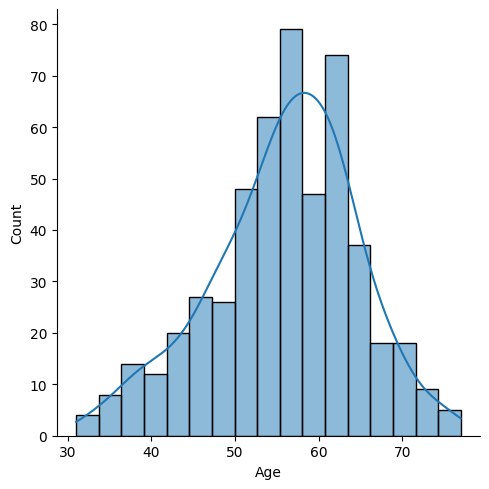

In [11]:
sns.displot(df_with_hd['Age'] , kde = True)

Relation between people having heart disease and age group

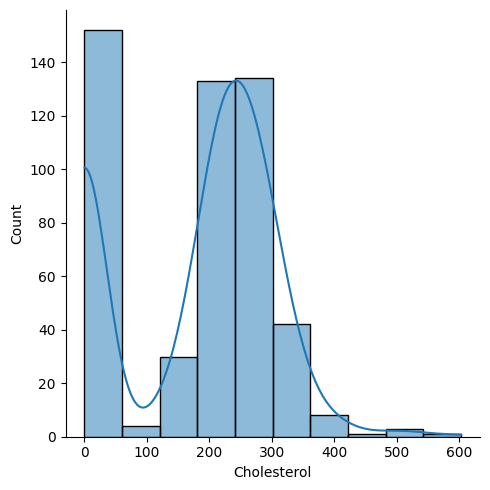

In [12]:
sns.displot(df_with_hd['Cholesterol'] , kde = True)

Relation between people having heart disease and Cholestrol level

### Label Encoding

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG']= label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope'])

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 75.3 KB


Now all the values in the column is in the form of integer or floating

### Finding Correlation

In [16]:
corr_matrix=df.corr()
corr_matrix

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


Text(0.5, 1.0, 'Monthly resampling')

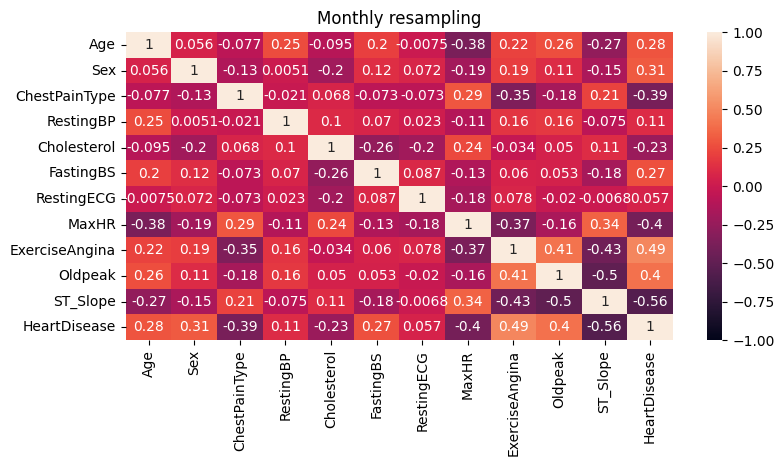

In [17]:
f= plt.figure(figsize=(30,4))
ax=f.add_subplot(131)
#dfm = df.resample('M').mean()
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

Here the correlation of HeartDisease is highest with ExerciseAngina and lowest with ST_Slope

### Removing Outliers

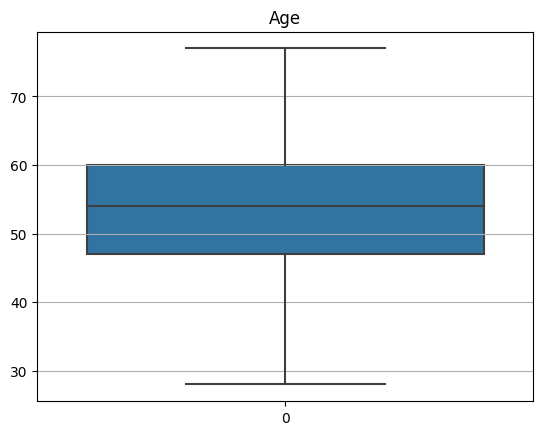

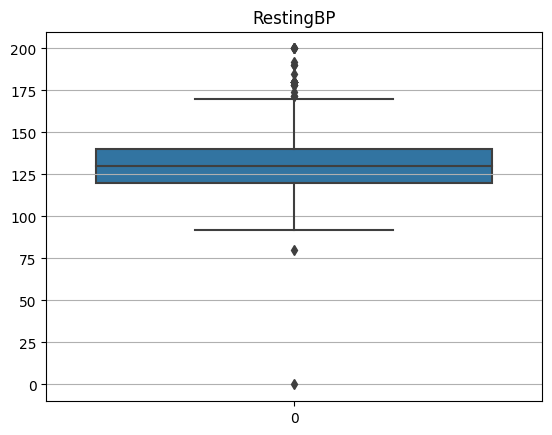

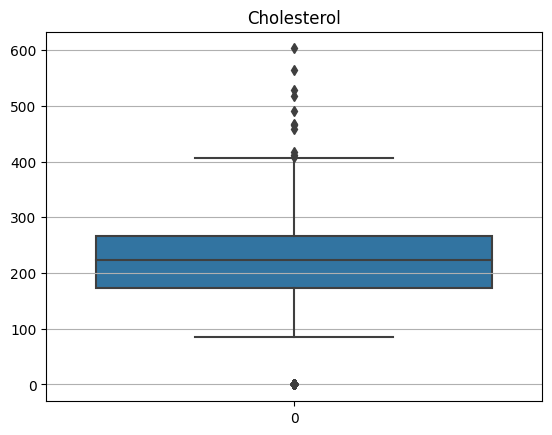

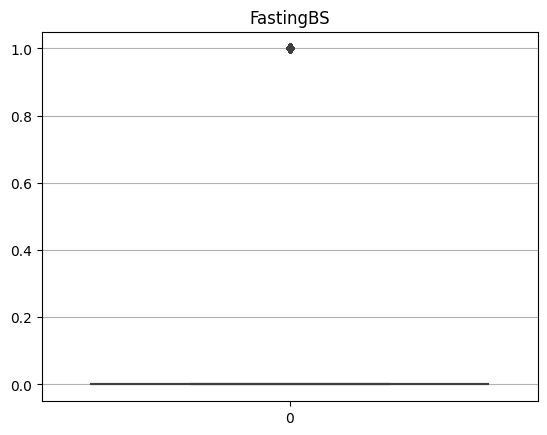

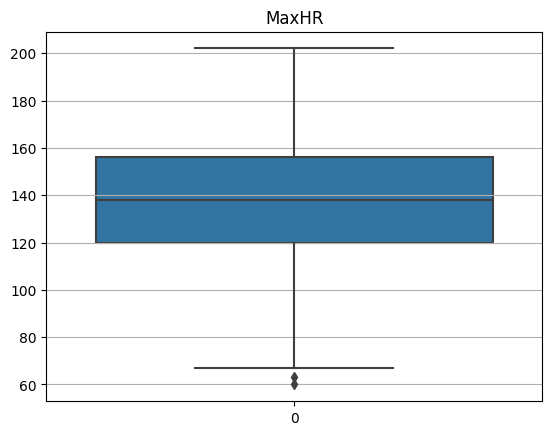

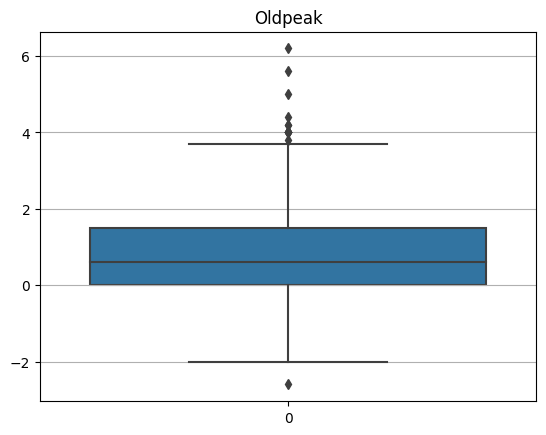

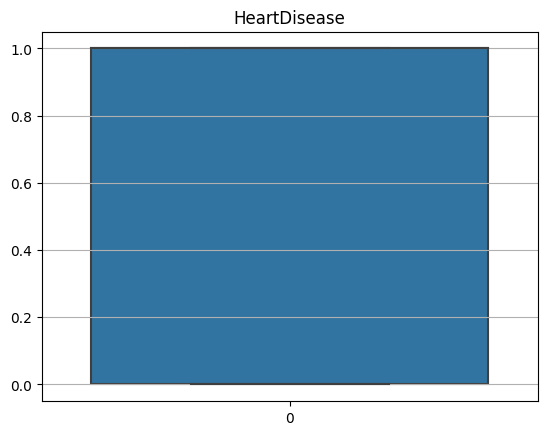

In [18]:
for i in df.keys():
    if(df[i].dtypes!='int32'):
    #if(df.i.dtype!='int32')
        plt.grid()
        plt.title(str(i))
        sns.boxplot(data=df[str(i)])
        plt.show()

In [19]:
n=df.shape
print("Number of datapoints before removing outliers:",n[0])

Number of datapoints before removing outliers: 918


In [20]:
df=df[df['RestingBP']<=170] 
df=df[df['RestingBP']>=85]
df=df[df['Cholesterol']<=410] 
df=df[df['Cholesterol']>=80]
df=df[df['Cholesterol']<=410] 
df=df[df['Cholesterol']>=80]

In [21]:
n=df.shape
print("Number of datapoints after removing outliers:",n[0])

Number of datapoints after removing outliers: 716


### Train test splitting of data

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the iris dataset
X = df.drop("HeartDisease", axis=1)
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
# initialize the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model to the training data
logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = logreg.predict(X_test)

# evaluate the model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy is:", round(accuracy*100,2),"%")

The Accuracy is: 89.58 %


In [38]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[58  7]
 [ 8 71]]
Precision: 0.8960518648018648
Recall: 0.8958333333333334
Specificity: 0.8923076923076924
F1 Score: 0.895899175053889


# Naive Bayes Model

In [39]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the NB classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy is:", round(accuracy*100,2),"%")


The Accuracy is: 88.19 %


In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[58  7]
 [10 69]]
Precision: 0.8830893102855177
Recall: 0.8819444444444444
Specificity: 0.8923076923076924
F1 Score: 0.8821334249602502


# K Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier


# Instantiate the KNeighborsClassifier class with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print("The Accuracy is:", round(accuracy*100,2),"%")

The Accuracy is: 68.06 %


In [55]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[50 26]
 [20 48]]
Precision: 0.6832904332904334
Recall: 0.6805555555555556
Specificity: 0.6578947368421053
F1 Score: 0.6807404549059961


# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier


# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy is:", round(accuracy*100,2),"%")


The Accuracy is: 86.81 %


In [72]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[69  7]
 [12 56]]
Precision: 0.8693415637860082
Recall: 0.8680555555555556
Specificity: 0.9078947368421053
F1 Score: 0.8676385579920368


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier with 50 trees
rf = RandomForestClassifier(n_estimators=50)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy is:", round(accuracy*100,2),"%")


The Accuracy is: 88.19 %


In [74]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[68  8]
 [ 9 59]]
Precision: 0.8819269453597811
Recall: 0.8819444444444444
Specificity: 0.8947368421052632
F1 Score: 0.8818930041152263


# Support Vector Machine

In [88]:
from sklearn.svm import SVC


# Instantiate the SVM classifier
svm = SVC(kernel='linear',degree=5)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy is:", round(accuracy*100,2),"%")

The Accuracy is: 84.03 %


In [89]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
# Calculate precision, recall, specificity, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Confusion Matrix: 
 [[66 17]
 [ 6 55]]
Precision: 0.8519483024691357
Recall: 0.8402777777777778
Specificity: 0.7951807228915663
F1 Score: 0.8412152693561862
